Import Libraries:

In [72]:
from qiskit.circuit.random import random_circuit
import scipy 
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile

In [943]:
dep_arr = []
for i in range(1000):
    UaUb = np.kron(get_u(2),get_u(2))
    q =  QuantumRegister(2,"qreg")
    qc = QuantumCircuit(q)

    customUnitary = Operator(UaUb)
    qc.unitary(customUnitary, [q[0], q[1]], label='custom')

    newCircuit = transpile(qc, basis_gates=['rx','ry','rz'], optimization_level = 3)
    # newCircuit.draw()
    
    dep_arr.append(newCircuit.depth())

In [944]:
dep_arr = np.array(dep_arr)
np.mean(dep_arr)

1.747

In [929]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute
from qiskit import Aer
backend = Aer.get_backend('unitary_simulator')


job = execute(newCircuit, backend, shots=8192)
result = job.result()

print(result.get_unitary(newCircuit,3))

Operator([[ 0.018-0.j, -0.243+0.j,  0.071-0.j, -0.967+0.j],
          [-0.243+0.j, -0.018+0.j, -0.967+0.j, -0.071+0.j],
          [-0.071+0.j,  0.967-0.j,  0.018-0.j, -0.243+0.j],
          [ 0.967-0.j,  0.071-0.j, -0.243+0.j, -0.018+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [965]:
selected_conc_noisy

In [902]:
def get_u(n):
    z = np.random.randn(n,n)/np.sqrt(2.0)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    return q

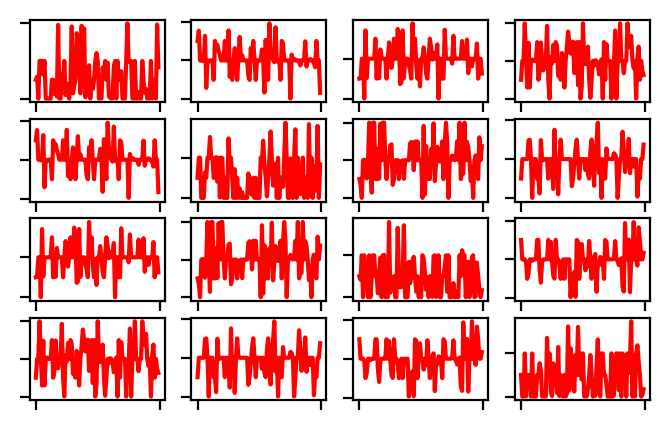

In [788]:
columns = 4
rows = 4
cnt = 0 
fig, ax_array = plt.subplots(rows, columns,squeeze=False)
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        axes.plot(np.array(d)[:,cnt],'r-')
        cnt += 1
plt.show()

In [974]:
random_circuit(2,10).draw()


┌────────┐┌──────┐┌──────┐┌───────────────────────────┐┌────┐»
q_0: ─■──────────┤1       ├┤0     ├┤ √Xdg ├┤ U3(2.3507,0.11337,3.5143) ├┤ √X ├»
      │P(3.6958) │  Iswap ││  Dcx │└┬────┬┘└────┬──────────────────┬───┘├───┬┘»
q_1: ─■──────────┤0       ├┤1     ├─┤ √X ├──────┤ R(1.3832,3.2035) ├────┤ Z ├─»
                 └────────┘└──────┘ └────┘      └──────────────────┘    └───┘ »
«               ┌───┐           ┌────┐┌───────────────┐»
«q_0: ──────────┤ Y ├───────────┤ Sx ├┤1              ├»
«     ┌─────────┴───┴──────────┐└─┬──┘│  Rxx(0.47229) │»
«q_1: ┤ U(2.888,1.7425,3.9018) ├──■───┤0              ├»
«     └────────────────────────┘      └───────────────┘»
«                                  
«q_0: ──────────────■──────────────
«     ┌─────────────┴─────────────┐
«q_1: ┤ U3(3.0993,4.1215,0.56844) ├
«     └───────────────────────────┘

In [78]:
from qiskit.quantum_info import Statevector, DensityMatrix
import qiskit 

In [97]:
2e-2

0.02

In [92]:
np.isclose(0,0.01,atol=2e-2)

True

In [95]:
0.02

0.02

In [94]:
selected_conc_noisy

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.07845909, 0.07845909, 0.07845909, 0.07845909, 0.07845909,
        0.07845909, 0.07845909, 0.07845909, 0.07845909, 0.07845909],
       [0.15643446, 0.15643445, 0.15643446, 0.15643446, 0.15643446,
        0.15643446, 0.15643446, 0.15643446, 0.15643446, 0.15643446],
       [0.23344535, 0.23344535, 0.23344536, 0.23344535, 0.23344536,
        0.23344536, 0.23344536, 0.23344536, 0.23344536, 0.23344536],
       [0.30901699, 0.30901698, 0.30901699, 0.30901699, 0.30901699,
        0.30901699, 0.30901699, 0.30901699, 0.30901699, 0.30901699],
       [0.38268343, 0.38268343, 0.38268342, 0.38268343, 0.38268343,
        0.38268342, 0.38268343, 0.38268343, 0.38268342, 0.38268342],
       [0.4539905 , 0.45399049, 0.45399049, 0.45399049, 0.45399049,
        0.45399049, 0.4539905 , 0.4539905 , 0.45399049, 0.45399049],
       [0.52249856, 0.52249856, 0.5224985

In [ ]:
def get_random_cdm():
    state = Statevector.from_int(0, 2**2)
    state = state.evolve(random_circuit(2,5))
    return DensityMatrix(state)

# def gen_data_cdm(n):
#     cnt = 0 
#     data_arr = np.zeros((n,16))
#     conc_arr = np.zeros((n))
#     while cnt < n:
#         trial_state = get_random_cdm()
#         if np.abs(np.array(trial_state).imag).sum() == 0 and qiskit.quantum_info.concurrence(trial_state)>0:
#             data_arr[cnt] = np.array(trial_state).real.flatten()
#             conc_arr[cnt] = qiskit.quantum_info.concurrence(trial_state)
#             cnt += 1 
#     return data_arr, conc_arr
        
def gen_data_cdm():
    cnt = 0 
    data_arr = np.zeros((210,16))
    conc_arr = np.zeros((210))
    
    for c_arr in selected_conc_noisy:
        for c in c_arr:
            Found = False
            while not Found:
                trial_state = get_random_cdm()
                if np.abs(np.array(trial_state).imag).sum() == 0 and np.isclose(qiskit.quantum_info.concurrence(trial_state),c,atol=2e-2):
                    data_arr[cnt] = np.array(trial_state).real.flatten()
                    conc_arr[cnt] = qiskit.quantum_info.concurrence(trial_state)
                    cnt += 1 
                    Found = True
                    print(cnt)
            
    return data_arr, conc_arr


d,e = gen_data_cdm()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


In [783]:
t_z,_,_ = vae_noisy.encoder.predict(d)

4/4 [==============================] - 0s 2ms/step


In [70]:

selected_conc_noisy.shape


(21, 10)

In [785]:
t_aa,_,_ = vae_noiseless.encoder.predict(d)

4/4 [==============================] - 0s 2ms/step


Text(0, 0.5, '$z_0$ of random 2-qubit')

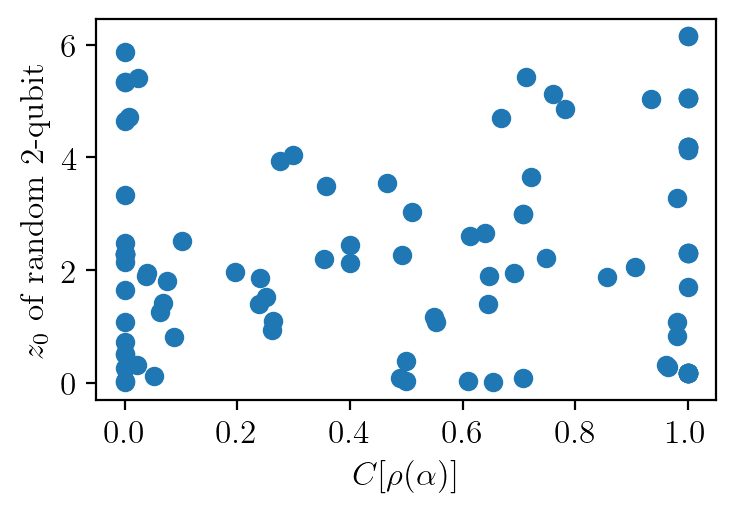

In [786]:
plt.scatter(e,np.abs(t_aa.flatten()))
plt.xlabel("$C[\\rho(\\alpha)]$")
plt.ylabel("$z_0$ of random 2-qubit")

In [69]:
plt.scatter(e,np.abs(t_z.flatten()))
plt.xlabel("$C[\\rho(\\alpha)]$")
plt.ylabel("$z_0$ of random 2-qubit")

NameError: name 'e' is not defined

In [2]:
%matplotlib inline
# %matplotlib notebook
from sklearn.model_selection import train_test_split
import numpy as np
import qutip as qt
from sklearn.manifold import TSNE
from vae import * 

In [3]:
fig_size_dim    = 4
golden_ratio    = (1+np.sqrt(5))/2
fig_size        = (fig_size_dim, fig_size_dim/golden_ratio)

def plot_style():
    font_size       = 12
    dpi             = 200

    params = {'figure.figsize': fig_size,
              'figure.dpi': dpi,
              'savefig.dpi': dpi,
              'font.size': font_size,
              'font.family': "serif",
              'figure.titlesize': font_size,
              'legend.fontsize': font_size,
              'axes.labelsize': font_size,
              'axes.titlesize': font_size,
              'xtick.labelsize': font_size,
              'ytick.labelsize': font_size,
              'text.usetex': True,
             }

    plt.rcParams.update(params)
plot_style()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
aaaaaaa = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

In [7]:
aaaaaaa = np.unique(aaaaaaa)

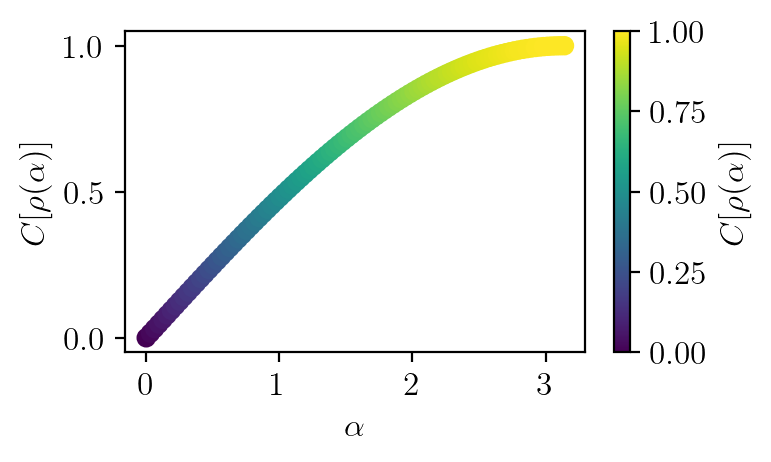

In [10]:
fig,ax = plt.subplots()
im = ax.scatter(scan_arr,aaaaaaa,c=aaaaaaa)
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$C[\\rho(\\alpha)]$")
cbar = fig.colorbar(im)
cbar.set_label("$C[\\rho(\\alpha)]$")
plt.tight_layout()
plt.savefig("/home/felix/Downloads/fig10_concurrence.pdf")

# Noiseless Dataset

Load Dataset

In [11]:
n_angle = 101
n_samples = 1000
rho_arr_noiseless = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr_noiseless))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

Define Hyperparameters:

In [12]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 1
hidden_act = "relu"
final_act = "tanh"

Load trained VAE:

In [13]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noiseless.h5")
decoder.load_weights("decoder_noiseless.h5")

vae_noiseless = VAE(encoder, decoder, beta)
vae_noiseless.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_noiseless.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae_noiseless.encoder.predict(X_test)

2023-04-06 15:09:59.918886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-06 15:09:59.918908: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-06 15:09:59.918928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felix-Latitude-5521): /proc/driver/nvidia/version does not exist
2023-04-06 15:09:59.919329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


790/790 [==============================] - 0s 440us/step


Investigate Latent Space

In [20]:
def linear_fit(x,y):
    fit_obj = np.polyfit(x, y, 1)
    fit_pred = np.poly1d(fit_obj)
    
    return np.reshape(fit_pred(x),(21,10))

def gen_plot_data(rho_array, vae_trained):
    idx = np.round(np.linspace(0, len(scan_arr) - 1, 21)).astype(int)
    selected_rho = np.zeros((21,10,16))
    selected_alpha = np.array([[scan_arr[i]]*10 for i in idx]).flatten()
    cnt = 0 
    for i in idx*1000:
        selected_rho[cnt] = rho_array[i:i+10] 
        cnt += 1 

    
    selected_rho_reshape = np.reshape(selected_rho,(210,16))
    z_mean, _, _ = vae_trained.encoder.predict(selected_rho_reshape)
    concur_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in selected_rho_reshape])
        
    pred_conc = linear_fit(np.abs(z_mean[:,0]),concur_arr)
    pred_alpha = linear_fit(z_mean[:,0],selected_alpha)
    
    

    
    
    
    return np.reshape(selected_alpha,(21,10)), np.reshape(concur_arr,(21,10)), np.reshape(z_mean,(21,10)), np.reshape(pred_conc,(21,10)), np.reshape(pred_alpha,(21,10))
    
    
selected_alpha_noiseless, selected_conc_noiseless, selected_z_noiseless, pred_conc_noiseless, pred_alpha_noiseless = gen_plot_data(rho_arr_noiseless, vae_noiseless)  
selected_alpha_noisy, selected_conc_noisy, selected_z_noisy, pred_conc_noisy, pred_alpha_noisy = gen_plot_data(rho_arr_noisy, vae_noisy)  
selected_alpha_generalized, selected_conc_generalized, selected_z_generalized, pred_conc_generalized, pred_alpha_generalized = gen_plot_data(rho_arr_noiseless, vae_noisy)  
    

7/7 [==============================] - 0s 665us/step


In [37]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

In [ ]:
2 panel 
1 fig alpha vs z0
2 fig conc vs z0 and conc vs z0 tilde

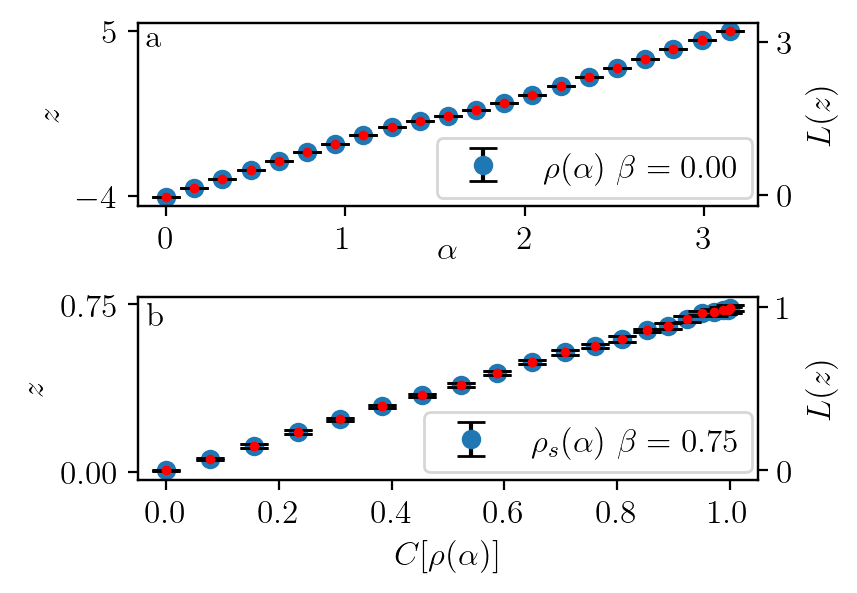

In [31]:
fig, ax = plt.subplots(2,1, figsize = (fig_size_dim, 1.2*fig_size_dim/golden_ratio))
ax[0].errorbar(selected_alpha_noiseless[:,0],np.mean(selected_z_noiseless,axis=1),np.std(selected_z_noiseless,axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho(\\alpha)\ \\beta=0.00$")
ax12 = ax[0].twinx()
ax12.errorbar(selected_alpha_noiseless[:,0],np.mean(pred_alpha_noiseless,axis=1),np.std(pred_alpha_noiseless,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="red",
             )




ax[1].errorbar(selected_conc_noisy[:,0],np.mean(np.abs(selected_z_noisy),axis=1),np.std(np.abs(selected_z_noisy),axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax22 = ax[1].twinx()
ax22.errorbar(selected_conc_noisy[:,0],np.mean(pred_conc_noisy,axis=1),np.std(pred_conc_noisy,axis=1),ls='',ms=2.5,marker="o",capsize=5, capthick=1, ecolor='black',color="red",
             )


ax[1].set_xlabel("$C[\\rho(\\alpha)]$")
ax[0].set_xlabel("$\\alpha$",labelpad=-7)


ax[0].set_ylabel("$z$")
ax[1].set_ylabel("$z$")

ax12.set_ylabel("$L(z)$")
ax22.set_ylabel("$L(z)$")




fig.text(0.135, 0.84, "a")
fig.text(0.135, 0.37, "b")



ax[0].set_yticks([-4,5])
ax12.set_yticks([0,3])

ax[1].set_yticks([0,0.75])
# ax22.set_yticks([0,3])



ax[0].legend(bbox_to_anchor=(0.455, 0.46), loc=2)
ax[1].legend(bbox_to_anchor=(0.435, 0.46), loc=2)


plt.subplots_adjust(hspace=0.5)
# plt.margins(x=0, y=0)
# plt.tight_layout()
plt.savefig("/home/felix/Downloads/fig4_latentrepresentation.pdf",bbox_inches="tight",pad_inches=0.1)
# plt.show()    



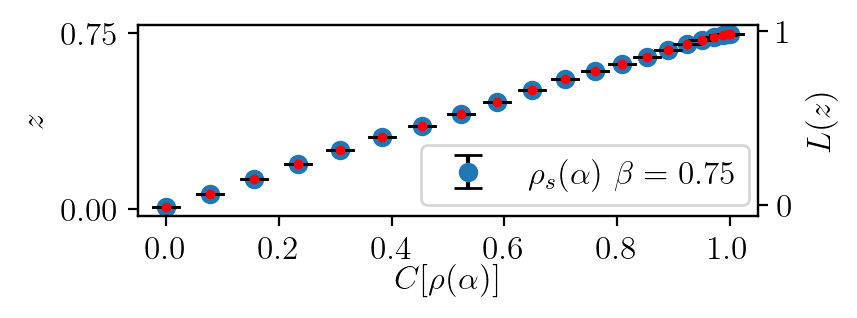

In [56]:
fig, ax = plt.subplots( figsize = (fig_size_dim, fig_size_dim/(2*golden_ratio)))
ax.errorbar(selected_conc_generalized[:,0],np.mean(selected_z_generalized,axis=1),np.std(selected_z_generalized,axis=1),ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$\\rho_s(\\alpha)\ \\beta=0.75$")
ax12 = ax.twinx()
ax12.errorbar(selected_conc_generalized[:,0],np.mean(pred_conc_generalized,axis=1),np.std(pred_conc_generalized,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="red",
             )

ax.set_xlabel("$C[\\rho(\\alpha)]$",labelpad=0)

ax.set_yticks([0,0.75])
ax12.set_yticks([0,1])

ax.legend(bbox_to_anchor=(0.43, 0.46), loc=2)

plt.subplots_adjust(hspace=0.5)
ax.set_ylabel("$z$")
ax12.set_ylabel("$L(z)$")
plt.savefig("/home/felix/Downloads/fig9_nonoise.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()    

In [582]:
gamma.size

101

In [60]:
gamma_10 = np.repeat(gamma,10)#np.reshape(np.repeat(gamma,10),(101,10))

rho_gamma_10 = np.repeat(rho_gamma,10,axis=0)#np.repeat(rho_gamma,10),(101,10,16))

In [61]:
z_mean_gamma_10, _, _ = vae_noisy.encoder.predict(rho_gamma_10)

test_10 = z_mean_gamma_10.flatten()*2 + (1-z_mean_gamma_10.flatten()[0]*2)

test_10 = z_mean_gamma_10.flatten()*2.01267278 -0.52129492

32/32 [==============================] - 0s 600us/step


In [62]:
x_10 = np.reshape(gamma_10,(101,10))
y_10 = np.reshape(test_10,(101,10))

In [65]:
# 

ccc_inx = [np.array(ccc)>0]
x = z_mean_gamma.flatten()[ccc_inx]#gamma[ccc_inx]
y = np.array(ccc)[ccc_inx]

fit_obj = np.polyfit(x, y, 1)
fit_pred = np.poly1d(fit_obj)


fit_pred(x)
fit_pred

/tmp/ipykernel_6987/455522865.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = z_mean_gamma.flatten()[ccc_inx]#gamma[ccc_inx]
/tmp/ipykernel_6987/455522865.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y = np.array(ccc)[ccc_inx]


poly1d([ 2.01274224, -0.52134368])

In [66]:
x = gamma
y = test

fit_obj = np.polyfit(x, y, 1)
fit_pred = np.poly1d(fit_obj)
fit_obj

NameError: name 'test' is not defined

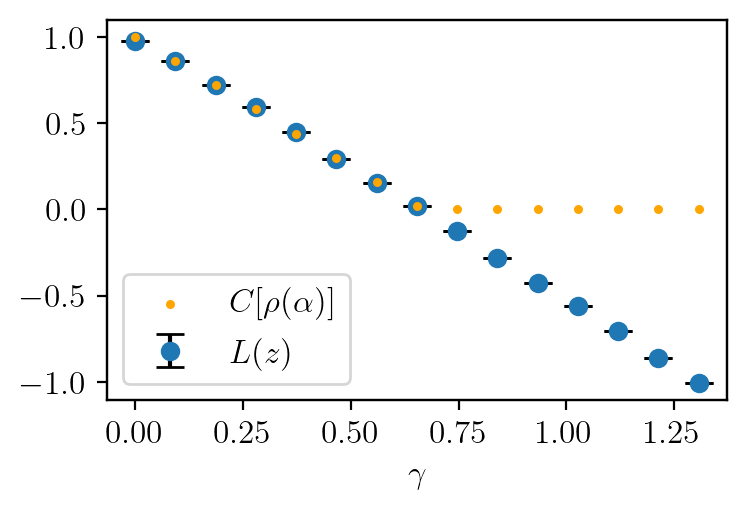

In [68]:
fig, ax = plt.subplots(figsize = (fig_size_dim, fig_size_dim/(1*golden_ratio)))


ax.errorbar(x_10[:,0][::7],np.mean(y_10,axis=1)[::7],np.std(y_10,axis=1)[::7],ls='',marker="o",capsize=5, capthick=1, ecolor='black',
              label="$L(z)$",zorder=-1)
ax.scatter(gamma[::7],ccc[::7],color="orange", label="$C[\\rho(\\alpha)]$",s = 5,zorder=1)
ax12 = ax.twinx()

# ax12.scatter(gamma[::7],ccc[::7],color="orange", label="$C[\\rho(\\alpha)]$",s = 5)

ax12.set_ylim([-1,1])
ax12.set_yticks([])

# ax12.errorbar(selected_conc_generalized[:,0],np.mean(pred_conc_generalized,axis=1),np.std(pred_conc_generalized,axis=1),ls='',marker="o",ms=2.5,capsize=5, capthick=1, ecolor='black',color="red",
#              )

# ax.scatter(gamma[::5],test[::5], label="$L(z)$")



ax.set_xlabel("$\\gamma$")
ax.legend(bbox_to_anchor=(0.0, 0.375), loc=2)

plt.savefig("/home/felix/Downloads/fig8_deco.pdf")#,bbox_inches="tight",pad_inches=0.1)
plt.show()    

In [496]:
# fig, ax = plt.subplots()

# ax.errorbar(selected_conc_generalized[:,0],np.mean(np.abs(selected_z_generalized),axis=1),np.std(np.abs(selected_z_generalized),axis=1),ls='-',marker="o",capsize=5, capthick=1, ecolor='black')


# ax.set_xlabel("$\\alpha$")
# ax.set_ylabel("$|\\tilde{z_0}|$")


# l, b, h, w = .225, .725, .1, .2
# ax2 = fig.add_axes([l, b, w, h])

# ax2.errorbar(selected_conc_generalized[:,0][::5],np.mean(pred_conc_generalized,axis=1)[::5],np.std(pred_conc_generalized,axis=1)[::5],ls='-',marker="o",capsize=5, capthick=1, ecolor='black')

# ax2.set_ylabel("$L(|\\tilde{z_0}|)$")
# ax2.yaxis.set_label_position("right")
# # plt.tight_layout()
# plt.show()

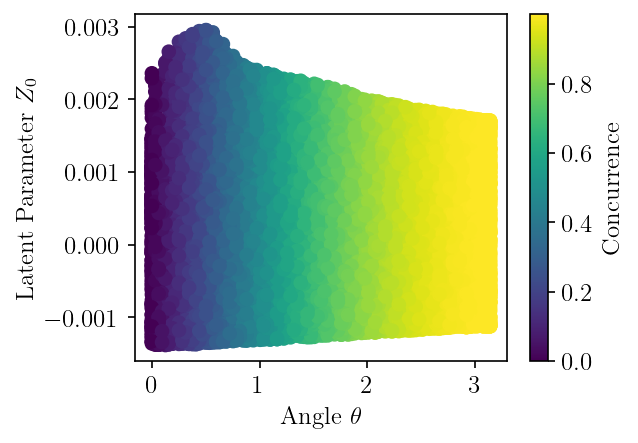

In [481]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

# Noisy Dataset  $\beta = 0$

Load Dataset

In [7]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

Define Hyperparameters:

In [8]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 1
hidden_act = "tanh"
final_act = "linear"

Load trained VAE:

In [9]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noise_0beta.h5")
decoder.load_weights("decoder_noise_0beta.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 430us/step


Investigate Latent Space

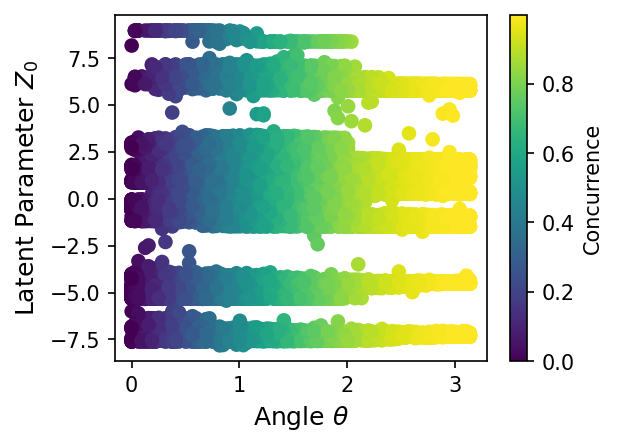

In [10]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

# Noisy Dataset  $0.75\beta$

Load Dataset

In [15]:
n_angle = 101
n_samples = 1000
rho_arr_noisy = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr_noisy))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr_noisy, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

In [185]:
rr_arr = np.array([qt.entropy_vn(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]]).ptrace(0)) for dm in X_test])

In [186]:
# sort_inx = np.argsort(y_test)
# plt.plot(rr_arr[sort_inx])

Define Hyperparameters:

In [17]:
batch_size = 64
beta = 0.75
learning_rate = 0.005
lat_dim = 1
hidden_act = "tanh"
final_act = "linear"

Load trained VAE:

In [18]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noise_075beta.h5")
decoder.load_weights("decoder_noise_075beta.h5")

vae_noisy = VAE(encoder, decoder, beta)
vae_noisy.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae_noisy.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae_noisy.encoder.predict(X_test)

790/790 [==============================] - 0s 463us/step


Investigate Latent Space

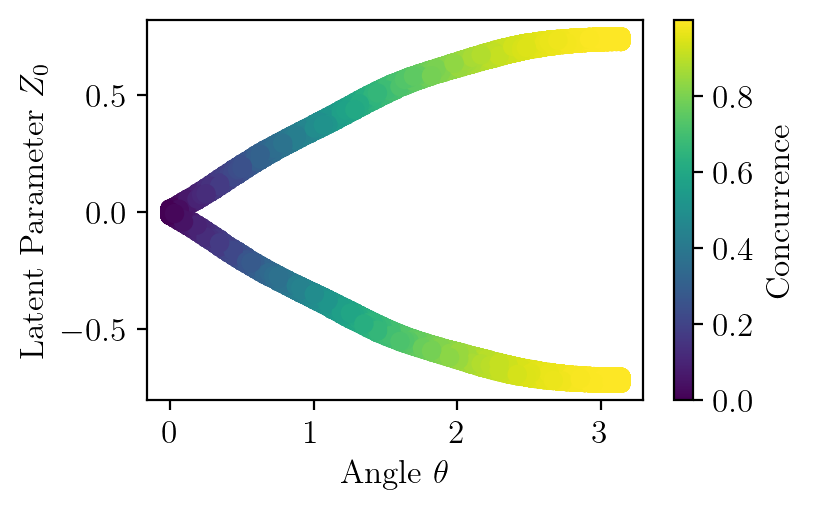

In [19]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

Investigate generalization and relation to concurrence 


In [190]:
rho_arr_noiseless = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
_, X_test_noiseless, _, y_test_noiseless = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
z_mean_noiseless, _, _ = vae.encoder.predict(X_test_noiseless)

790/790 [==============================] - 1s 647us/step


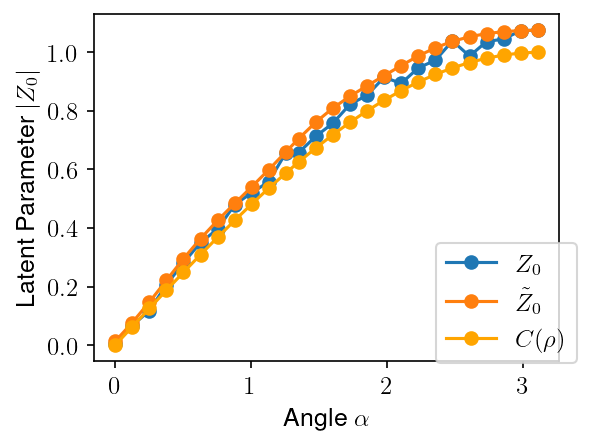

In [40]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000])/np.log(2),"-o", label="$Z_0$") 
ax.plot(y_test[sort_inx][::1000], z_mean_noiseless[sort_inx][:,0][::1000]/np.log(2),"-o", label=" $\\tilde{Z}_0$") 


ax.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

# ax.plot(y_test[sort_inx][::1000],rr_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")


# ax2 = ax.twinx()

# ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

In [8]:
rho_arr_deco = np.load('unitary_4x4_101_1000_deco_01.npy', mmap_mode="r")
_, X_test_deco, _, y_test_deco = train_test_split(rho_arr_deco, alpha_arr, random_state=42)
z_mean_deco, _, _ = vae.encoder.predict(X_test_deco)

concurrence_deco_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test_deco])

790/790 [==============================] - 1s 647us/step


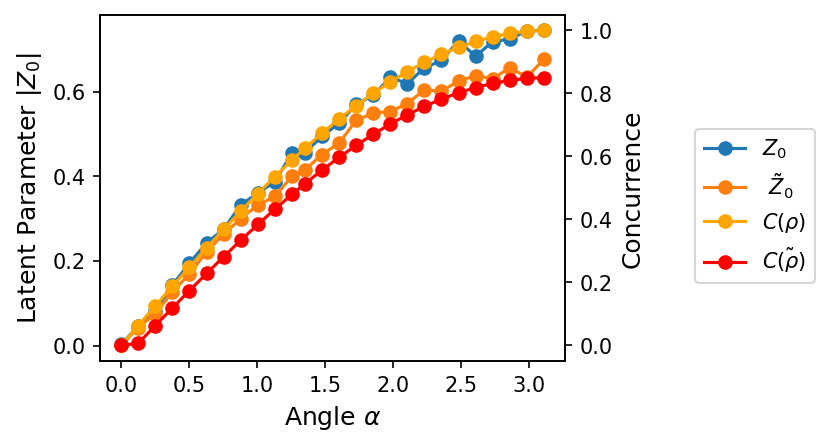

In [9]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000]),"-o", label="$Z_0$") 
ax.plot(y_test[sort_inx][::1000], np.abs(z_mean_deco[sort_inx][:,0][::1000]),"-o", label=" $\\tilde{Z}_0$") 


ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")
ax2.plot(y_test[sort_inx][::1000],concurrence_deco_arr[sort_inx][::1000],"-o", c="red",label= "$\\tilde{C(\\rho)}$")


ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(1.1, 0.65), loc=2)

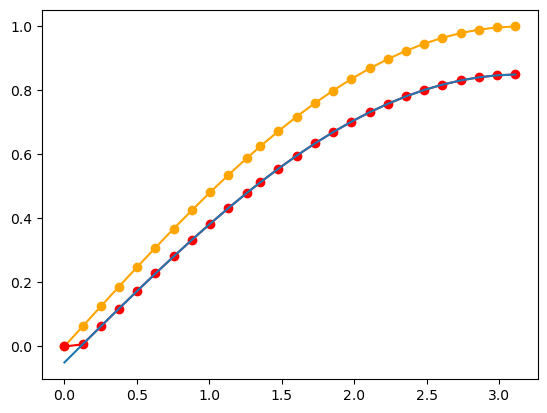

In [11]:
plt.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")
plt.plot(y_test[sort_inx][::1000],concurrence_deco_arr[sort_inx][::1000],"-o", c="red",label= "$\\tilde{C(\\rho)}$")
plt.plot(y_test[sort_inx][::1000],(0.9)*concurrence_arr[sort_inx][::1000]-0.05)

In [60]:
rr_arr = np.array([qt.entropy_vn(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]]).ptrace(1)) for dm in rho_gamma])

In [63]:
dm = rho_gamma[-1]
qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.16666667  0.          0.         -0.16666667]
 [ 0.          0.33333333  0.          0.        ]
 [ 0.          0.          0.33333333  0.        ]
 [-0.16666667  0.          0.          0.16666667]]

In [135]:
from qiskit.quantum_info import Statevector, DensityMatrix, entropy, partial_trace
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute

def circuit(theta):
    q = QuantumRegister(2,'q')
    circuit = QuantumCircuit(q)
    circuit.h(q[0])
    circuit.cry(theta,q[0],q[1])
    return circuit

def get_dm(theta):
    state = Statevector.from_int(0, 2**2)
    state = state.evolve(circuit(theta))
    return DensityMatrix(state)


def get_u(n):
    z = np.random.randn(n,n)/np.sqrt(2.0)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    return q

def apply_u(dm):
    UaUb = qt.Qobj(np.kron(get_u(2),get_u(2)),dims = [[2, 2], [2, 2]])
    return  UaUb * dm * UaUb.dag()  

def gen_angle_circ(n_points, n_samples, max_epsilon):
    th_scan_template = np.linspace(0, np.pi, n_points)
    th_scan = np.zeros((n_points, n_samples))
    for cnt, theta in enumerate(th_scan_template):
        th_scan[cnt] = theta + max_epsilon * np.random.uniform(-1, 1, size=n_samples)
    return th_scan

def apply_deco(alpha, dm):
#     return alpha*dm  + (1 - alpha)/2**2 * dm.tr() * qt.identity([2,2])
    return (1 - alpha)*dm  + alpha/2**2 * qt.identity([2,2])

dm = get_dm(np.pi)

# r_1 = apply_deco(0,apply_u( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
# r_2 = apply_deco(0.1,apply_u( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))


r_1 = apply_deco(0,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
r_2 = apply_deco(0.1,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))
r_3 = apply_deco(0.2,( qt.Qobj(dm.data,dims=[[2,2],[2,2]])))


In [177]:
r_4 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real
r_5 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real
r_6 = qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]])#.full().real

r_4_arr = r_4.full().real.flatten()
r_5_arr = r_5.full().real.flatten()
r_6_arr = r_6.full().real.flatten()

qt.concurrence(r_4), qt.concurrence(r_5), 


test_arr = [qt.Qobj(qt.rand_dm(4),dims=[[2,2],[2,2]]) for i in range(100)]
test_a = [i.full().real.flatten() for i in test_arr]
c_a = [qt.concurrence(i) for i in test_arr]


In [179]:
z_m, _, _ = vae_noisy.encoder.predict(np.array(test_a))

4/4 [==============================] - 0s 1ms/step


In [138]:
z_m, _, _ = vae_noisy.encoder.predict(np.array([r_1_arr,r_2_arr,r_3_arr]))

1/1 [==============================] - 0s 13ms/step


In [64]:
ccc = [qt.concurrence(qt.Qobj(np.reshape(dm,(4,4)),dims=[[2,2],[2,2]])) for dm in rho_gamma]


In [59]:
gamma = np.load('/home/felix/Downloads/gamma_new.npy', mmap_mode="r")
rho_gamma = np.load('/home/felix/Downloads/rho_gamma_noiseless.npy', mmap_mode="r")



z_mean_gamma, _, _ = vae_noisy.encoder.predict(rho_gamma)

4/4 [==============================] - 0s 1ms/step


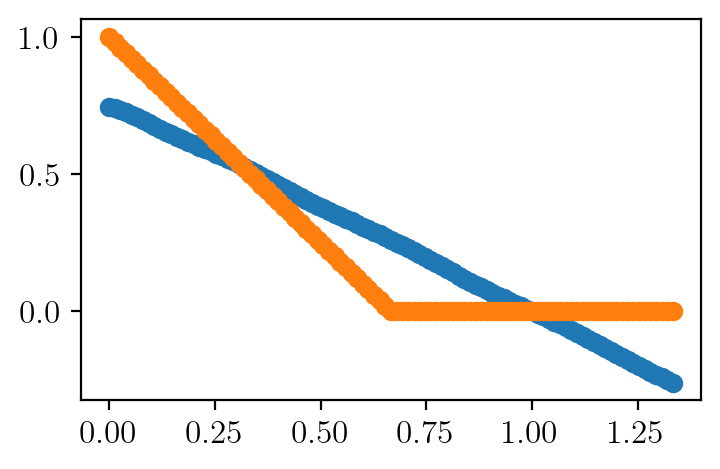

In [497]:
plt.scatter(gamma,z_mean_gamma)
plt.scatter(gamma,ccc)



In [97]:
offset = 1-z_mean_gamma.flatten()[0]

In [115]:
test = (1-gamma)*z_mean_gamma.flatten() #+ gamma/2

In [502]:
test = z_mean_gamma.flatten()*2 + (1-z_mean_gamma.flatten()[0]*2)

# Multiple Experiments

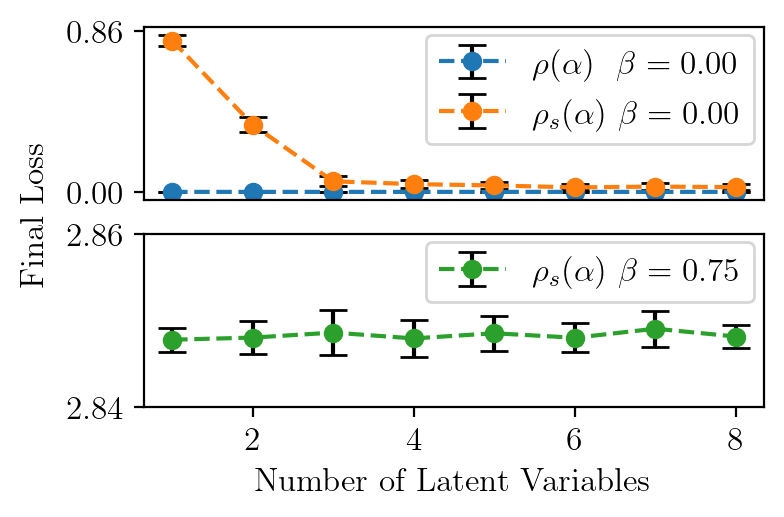

In [48]:
lat_arr = np.arange(1,9)
n_exp = 9


recon_loss_noiseless = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise_075 = np.zeros((len(lat_arr),n_exp, 1))


for cnt_1, inx in enumerate(lat_arr):
    for cnt_2 in range(n_exp):
        read_dictionary = np.load('no_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noiseless[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_075beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise_075[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]

av_recon_loss_arr_noiseless = np.average(recon_loss_noiseless,axis=1)
std_recon_loss_arr_noiseless = np.std(recon_loss_noiseless,axis=1)

av_recon_loss_arr_noise = np.average(recon_loss_noise,axis=1)
std_recon_loss_arr_noise = np.std(recon_loss_noise,axis=1)

av_recon_loss_arr_noise_075 = np.average(recon_loss_noise_075,axis=1)
std_recon_loss_arr_noise_075 = np.std(recon_loss_noise_075,axis=1)

fig, ax = plt.subplots(2,1)


# ax[0].plot(lat_arr, av_recon_loss_arr_noiseless, marker='o', markersize="5",label="$\\rho(\\alpha)\ \  \\beta=0.00$")
# ax[0].fill_between(lat_arr, (av_recon_loss_arr_noiseless - std_recon_loss_arr_noiseless).flatten(), (av_recon_loss_arr_noiseless + std_recon_loss_arr_noiseless).flatten(), alpha=0.2)

# ax[0].plot(lat_arr, av_recon_loss_arr_noise, marker='o', markersize="5",label="$\\rho_s(\\alpha)\ \\beta=0.00$")
# ax[0].fill_between(lat_arr, (av_recon_loss_arr_noise - std_recon_loss_arr_noise).flatten(), (av_recon_loss_arr_noise + std_recon_loss_arr_noise).flatten(), alpha=0.2)

# ax[1].plot(lat_arr, av_recon_loss_arr_noise_075, marker='o', markersize="5",label="$\\rho_s(\\alpha)\ \\beta=0.75$",c="green")
# ax[1].fill_between(lat_arr, (av_recon_loss_arr_noise_075 - std_recon_loss_arr_noise_075).flatten(), (av_recon_loss_arr_noise_075 + std_recon_loss_arr_noise_075).flatten(), alpha=0.2,color="green")


ax[0].errorbar(lat_arr, av_recon_loss_arr_noiseless.flatten(),std_recon_loss_arr_noiseless.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho(\\alpha)\ \  \\beta=0.00$")
ax[0].errorbar(lat_arr, av_recon_loss_arr_noise.flatten(),std_recon_loss_arr_noise.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\  \\beta=0.00$")

ax[1].errorbar(lat_arr, av_recon_loss_arr_noise_075.flatten(),std_recon_loss_arr_noise_075.flatten(),ls='--',marker="o",capsize=5, capthick=1, ecolor='black',label="$\\rho_s(\\alpha)\ \\beta=0.75$",color="C2")



ax[1].set_xlabel("Number of Latent Variables")
# ax[0].set_ylabel("Final Reconstruction Loss",fontsize=12)

ax[0].set_xticks([])

ax[1].set_ylim([2.84,2.86])
ax[1].set_yticks([2.84,2.86])

ax[0].set_yticks([0,0.86])

# fig.legend(bbox_to_anchor=(0.9, 0.88))

ax[0].legend(bbox_to_anchor=(1.01, 1.05))
ax[1].legend(bbox_to_anchor=(1.01, 1.05))



fig.text(-0.03, 0.5, 'Final Loss', va='center', rotation='vertical',fontsize=12)
plt.savefig("/home/felix/Downloads/fig3_reconloss.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()

# Beta Scan

In [381]:
def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

In [382]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

In [388]:
batch_size = 64
learning_rate = 0.0001
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [385]:
inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}

In [415]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format("03"))
decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format("03"))

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

In [416]:
z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 470us/step


In [417]:
for i in range(8):
        print(i,np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

0 4.9011305e-07
1 1.4401295
2 3.3859098e-07
3 7.5675825e-07
4 0.6924004
5 5.6178146e-07
6 1.392459e-07
7 0.7296834


In [414]:
# z_001_1 = z_mean[:,0]
# z_001_2 = z_mean[:,4]

# z_02_1 = z_mean[:,0]
# z_02_2 = z_mean[:,7]

# z_04_1 = z_mean[:,6]
# z_04_2 = z_mean[:,7]


# z_07_1 = z_mean[:,1]
# z_07_2 = z_mean[:,4]






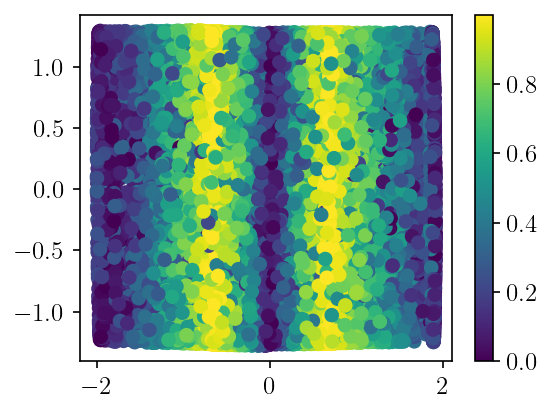

In [418]:
plot_scatter(z_mean[:,1], z_mean[:,7],concurrence_arr,"","","",1)

In [356]:
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format(inx))
    decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

790/790 [==============================] - 0s 461us/step


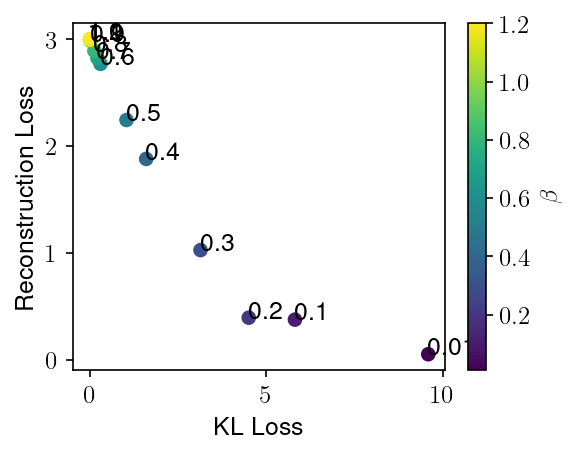

In [357]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)
im = ax.scatter(kl_loss_arr, recon_loss_arr, c=list(inx_dict.values()))
cbar = fig.colorbar(im)
cbar.set_label("$\\beta$")
plt.xlabel("KL Loss")
plt.ylabel("Reconstruction Loss")


for i, txt in enumerate(inx_dict.values()):
    ax.annotate(txt, (kl_loss_arr[i], recon_loss_arr[i]))

plt.show()

In [358]:
["$Z_{7}$","$Z_{6}$","$Z_{5}$","$Z_{4}$","$Z_{3}$","$Z_{2}$","$Z_{1}$","$Z_{0}$"]

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

In [470]:
from mpl_toolkits.axes_grid1 import make_axes_locatable



Text(0.5, 0.56, '$L_{KL}^{(i)}$')

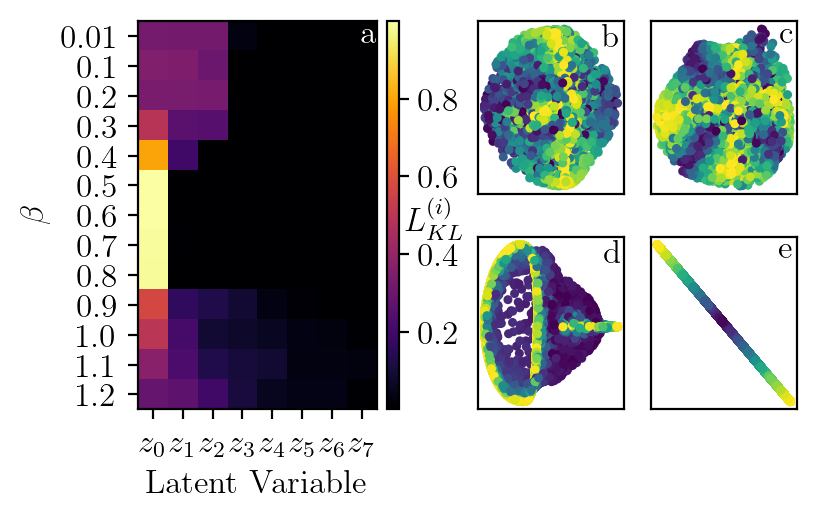

In [975]:
fig = plt.figure(constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'Top1','Top2'],['Left', 'Bottom1','Bottom2']],
                          gridspec_kw={'width_ratios':[2,0.8,0.8]})


im = axs['Left'].imshow(np.flip(new_matrix,axis=1),cmap="inferno")

divider = make_axes_locatable(axs['Left'])
cax = divider.append_axes('right', size='5%', pad=0.05)

cbar = plt.colorbar(im, cax=cax, orientation='vertical')

axs['Left'].set_xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
axs['Left'].set_yticks(range(len(inx_dict)),["${}$".format(i) for i in beta_list])     

axs['Left'].set_xlabel("Latent Variable")
axs['Left'].set_ylabel("$\\beta$")

axs["Top1"].set_xticks([])
axs["Top1"].set_yticks([])
axs["Top2"].set_xticks([])
axs["Top2"].set_yticks([])
axs["Bottom1"].set_xticks([])
axs["Bottom1"].set_yticks([])
axs["Bottom2"].set_xticks([])
axs["Bottom2"].set_yticks([])

axs["Top1"].scatter(z_001_1,z_001_2, c= concurrence_arr,s=5)
axs["Top2"].scatter(z_02_1,z_02_2, c= concurrence_arr,s=5)
axs["Bottom1"].scatter(z_04_1,z_04_2, c= concurrence_arr,s=5)
axs["Bottom2"].scatter(z_07_1,z_07_2, c= concurrence_arr,s=5)



fig.text(0.444, 0.94, "a",c="white")
fig.text(0.745, 0.932, "b")
fig.text(0.968, 0.94, "c")

fig.text(0.748, 0.495, "d")
fig.text(0.966, 0.505, "e")

fig.text(0.5,0.56,"$L_{KL}^{(i)}$")


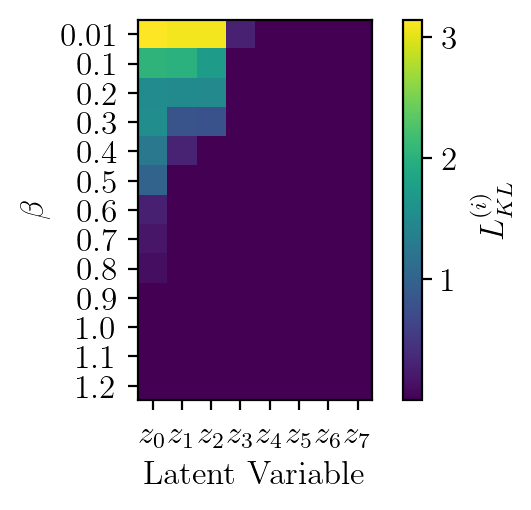

In [976]:
row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

new_matrix = np.sort(full_kl_loss_arr,axis=-1)


fig, ax = plt.subplots()
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

# 3 LV with ramp

In [304]:
batch_size = 64
beta = 0.75
learning_rate = 0.005
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

In [305]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_0beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_0beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 459us/step


<IPython.core.display.Javascript object>


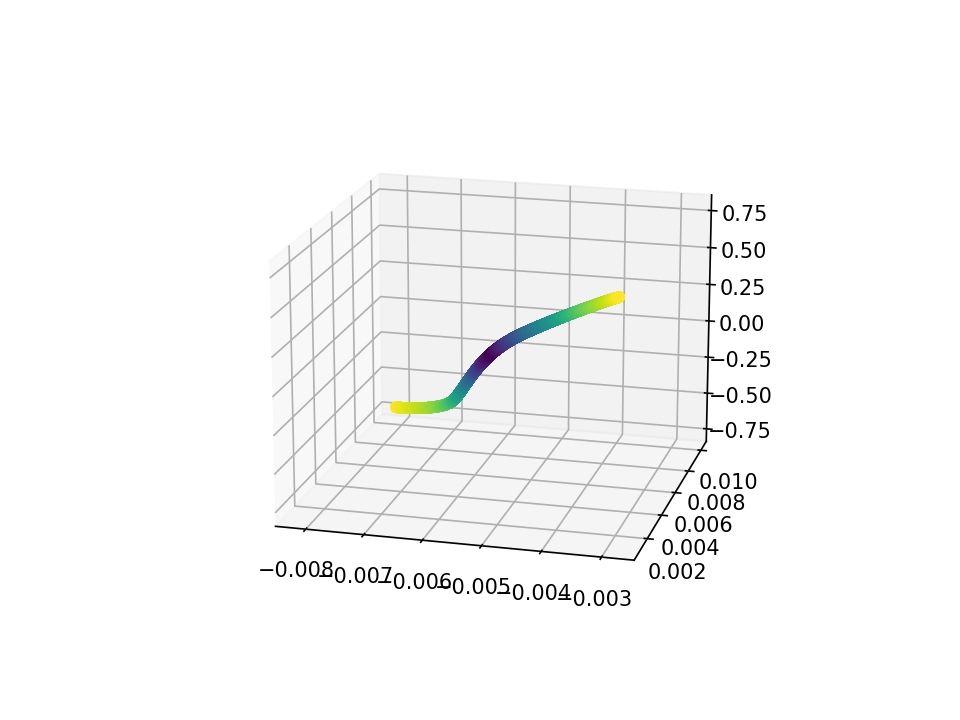

In [10]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr,alpha=1)

<IPython.core.display.Javascript object>


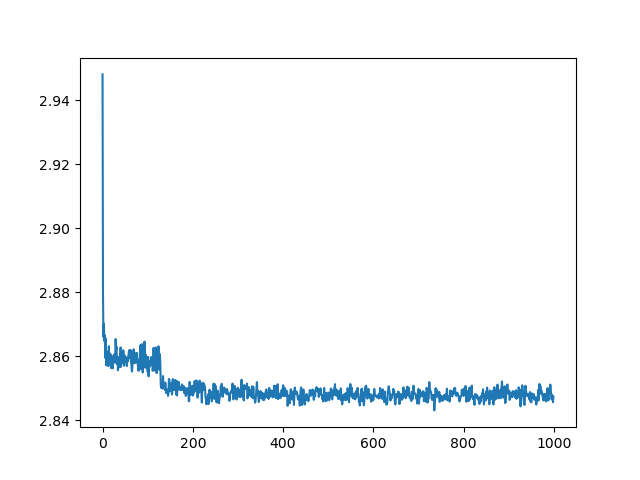

In [16]:
read_dictionary = np.load('/home/felix/Downloads/vae/history_3lv_0beta_ramp.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"])
        

# 3 LV with ramp

In [49]:
batch_size = 64
beta = 0.0
learning_rate = 0.0001
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

In [50]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_00beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 503us/step


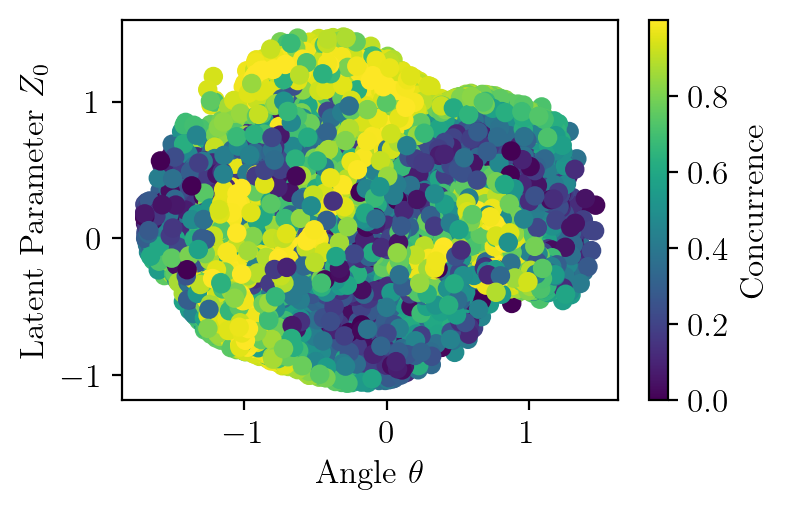

In [51]:
plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

In [ ]:
# rc('font',size=23)
# rc('font',family='serif')
# rc('axes',labelsize=23)

# [t.set_va('center') for t in ax.get_yticklabels()]
# [t.set_ha('left') for t in ax.get_yticklabels()]
# [t.set_va('center') for t in ax.get_xticklabels()]
# [t.set_ha('right') for t in ax.get_xticklabels()]
# [t.set_va('center') for t in ax.get_zticklabels()]
# [t.set_ha('left') for t in ax.get_zticklabels()]

# ax.xaxis._axinfo['tick']['inward_factor'] = 0
# ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
# ax.yaxis._axinfo['tick']['inward_factor'] = 0
# ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
# ax.zaxis._axinfo['tick']['inward_factor'] = 0
# ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
# ax.zaxis._axinfo['tick']['outward_factor'] = 0.4

# ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_major_locator(MultipleLocator(1))
# ax.zaxis.set_major_locator(MultipleLocator(1))

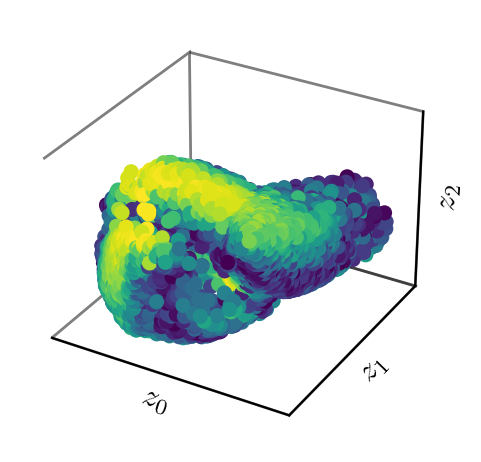

In [53]:
from matplotlib import rc
from matplotlib.ticker import MultipleLocator 


fig = plt.figure()
ax = fig.add_subplot(projection='3d')


# ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr)

ax.scatter(z_mean[:,0], z_mean[:,2],z_mean[:,1], c=concurrence_arr, alpha=1)


# ax.scatter(z_mean[:,1], z_mean[:,0],z_mean[:,2], c=concurrence_arr)
# ax.scatter(z_mean[:,1], z_mean[:,2],z_mean[:,0], c=concurrence_arr)

# ax.scatter(z_mean[:,2], z_mean[:,0],z_mean[:,1], c=concurrence_arr)
# ax.scatter(z_mean[:,2], z_mean[:,1],z_mean[:,0], c=concurrence_arr)



ax.set_xlabel("$z_0$",labelpad=-15)
ax.set_ylabel("$z_1$",labelpad=-15,)
ax.set_zlabel("$z_2$",labelpad=-15)



ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False



ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
                   

plt.tight_layout()
plt.savefig("/home/felix/Downloads/fig5_3dlat.pdf")#,bbox_inches="tight",pad_inches=0.1)
# ax.dist = 8

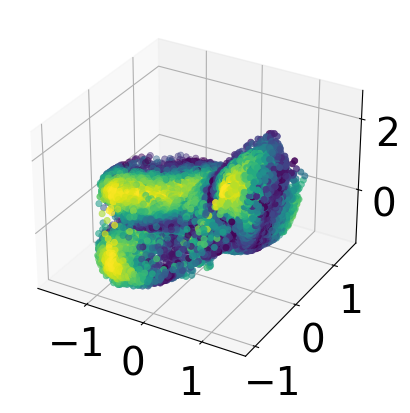

In [9]:
ax = plt.axes(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr, linewidth=0.5);

/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<IPython.core.display.Javascript object>


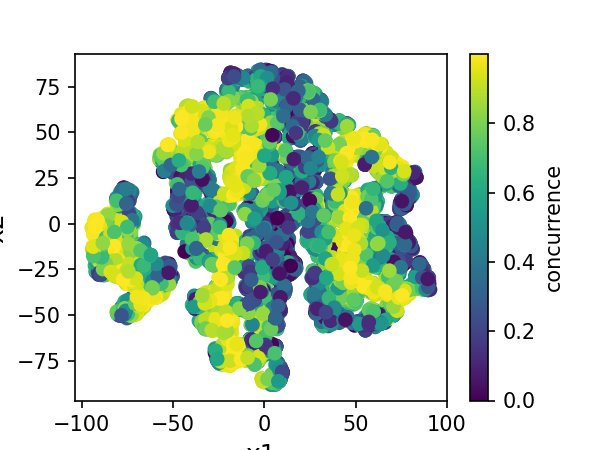

In [21]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:10000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:10000],"x1","x2","concurrence", 1)

# 3 LV without ramp

In [101]:
batch_size = 64
beta = 0.00
learning_rate = 0.005
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

In [145]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_00beta_noramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_00beta_noramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 496us/step


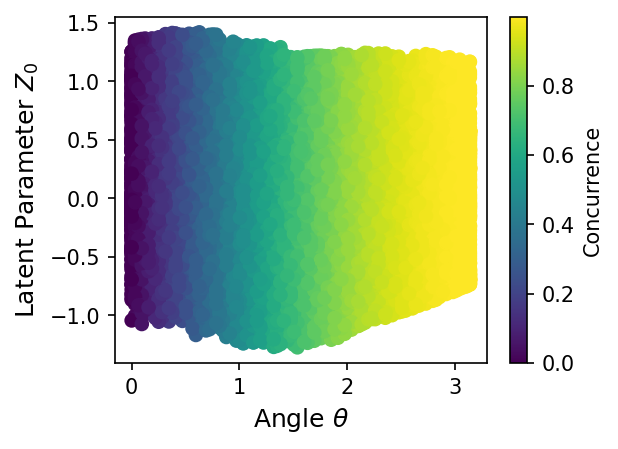

In [146]:
plot_scatter(y_test,z_mean[:,1],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

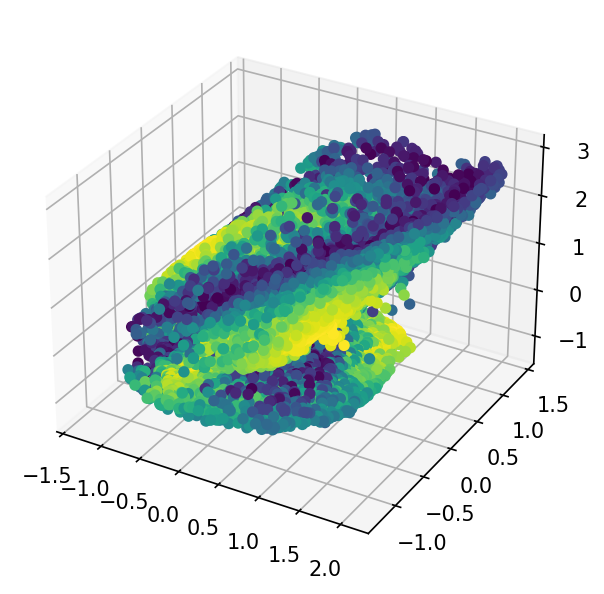

In [147]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr,alpha=1)

# 8 LV with ramp

In [125]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [138]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 529us/step


/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


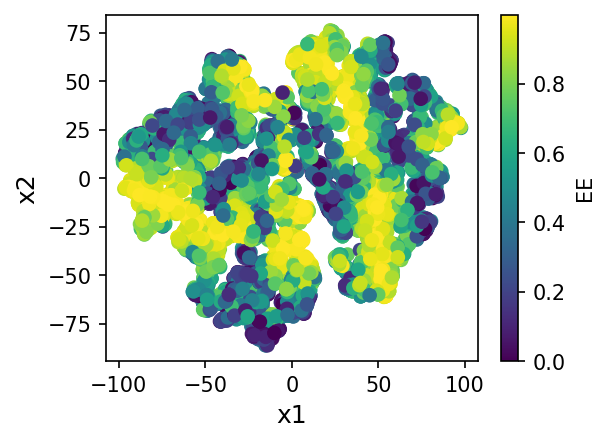

In [140]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:10000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:10000],"x1","x2","concurrence", 1)

# 8 LV without ramp

In [133]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [134]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_noramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_noramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 534us/step


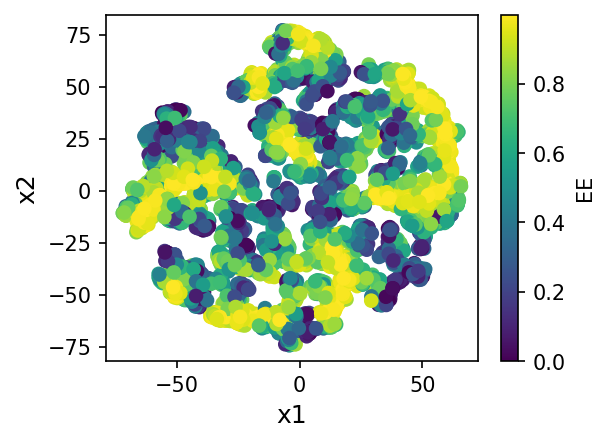

In [136]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:5000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:5000],"x1","x2","EE", 1)